In [39]:
import numpy as np
import xarray as xr
import cartopy
import matplotlib
import cmocean.cm as cmo
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

### (BTSF)

In [2]:
btsf = xr.open_dataset('/mnt/efs/data/ecco/barotropic_streamfunction_north_atlantic.nc')

In [23]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

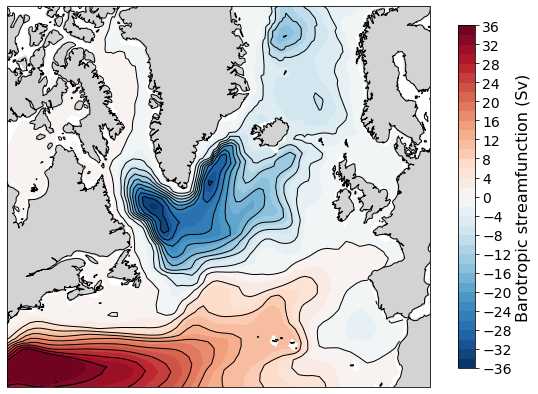

In [27]:
fig = plt.figure(figsize=(10,7))

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-72, -5, 30, 78], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)

p = ax.contourf(btsf.lon, btsf.lat,np.ma.masked_invalid(np.clip(btsf.psi.mean('time'),-36,36)),
                  cmap='RdBu_r',vmin=-36,vmax=36,levels=np.arange(-36,38,2),
                transform=cartopy.crs.PlateCarree(),zorder=0)
ax.contour(btsf.lon, btsf.lat,np.ma.masked_invalid(np.clip(btsf.psi.mean('time'),-36,36)),
           levels=np.arange(-36,38,4),colors='k',linewidths=1,transform=cartopy.crs.PlateCarree(),zorder=0)

cb = fig.colorbar(p, ticks=np.arange(-36,38,4), orientation='vertical', shrink=0.9)
cb.set_label(r'Barotropic streamfunction (Sv)',fontsize=16)
cb.ax.tick_params(labelsize=14)

plt.savefig('/mnt/efs/figure.png')
plt.show()

In [28]:
# Mean sea surface height above geoid
mdt = xr.open_dataset('/mnt/efs/data/mdt_cnes_cls2013_global.nc')

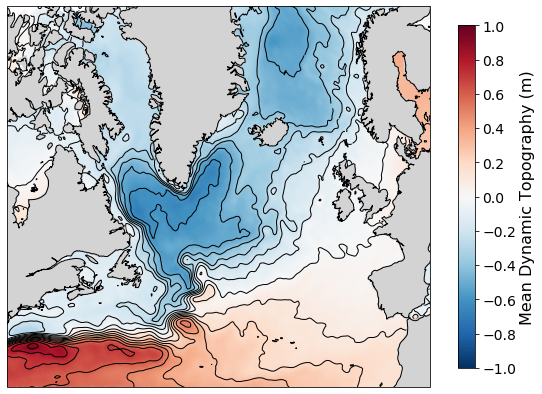

In [48]:
fig = plt.figure(figsize=(10,7))

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-72, -5, 30, 78], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)

p = ax.pcolormesh(mdt.lon-0.125, mdt.lat-0.125, np.ma.masked_invalid(mdt.mdt[0]), cmap='RdBu_r', vmin=-1,vmax=1,
                transform=cartopy.crs.PlateCarree(),zorder=0)
#p = ax.contourf(mdt.lon, mdt.lat,np.ma.masked_invalid(mdt.mdt[0]),cmap='RdBu_r',vmin=-1,vmax=1,
#                levels=np.arange(-1,1,0.1),transform=cartopy.crs.PlateCarree(),zorder=0)
ax.contour(mdt.lon, mdt.lat,np.ma.masked_invalid(mdt.mdt[0]),
           levels=np.arange(-1,1,0.1),colors='k',linewidths=1,transform=cartopy.crs.PlateCarree(),zorder=0)

cb = fig.colorbar(p, ticks=np.arange(-1,1.2,0.2), orientation='vertical', shrink=0.9)
cb.set_label(r'Mean Dynamic Topography (m)',fontsize=16)
cb.ax.tick_params(labelsize=14)

plt.savefig('/mnt/efs/figure.png')
plt.show()

In [54]:
pden = xr.open_dataset('/mnt/efs/data/RG_ArgoClim_Pden_north_atlantic.nc').pden.sel(time=slice('2004-01-01',
                                                                                               '2018-12-31'))

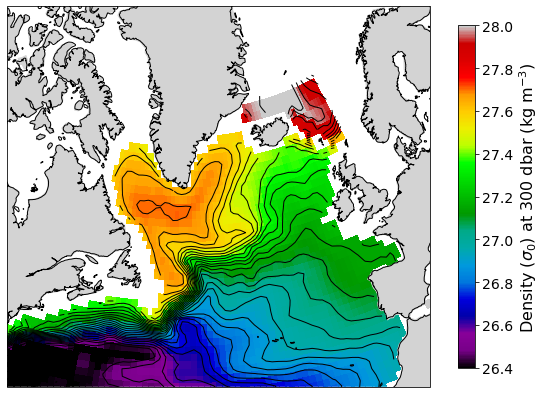

In [78]:
fig = plt.figure(figsize=(10,7))

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-72, -5, 30, 78], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)

p = ax.pcolormesh(pden.lon-0.5, pden.lat-0.5, np.ma.masked_invalid(pden.sel(pres=300).mean('time')),
                  cmap='nipy_spectral', vmin=26.4, vmax=28.00, transform=cartopy.crs.PlateCarree(),zorder=0)
#p = ax.contourf(mdt.lon, mdt.lat,np.ma.masked_invalid(mdt.mdt[0]),cmap='RdBu_r',vmin=-1,vmax=1,
#                levels=np.arange(-1,1,0.1),transform=cartopy.crs.PlateCarree(),zorder=0)
ax.contour(pden.lon, pden.lat, np.ma.masked_invalid(pden.sel(pres=300).mean('time')),
           levels=np.arange(26.4,28.00,0.05), colors='k', linewidths=1, transform=cartopy.crs.PlateCarree(),zorder=0)

cb = fig.colorbar(p, ticks=np.arange(26.4,28.2,0.2), orientation='vertical', shrink=0.9)
cb.set_label(r'Density ($\sigma_0$) at 300 dbar (kg m$^{-3}$)',fontsize=16)
cb.ax.tick_params(labelsize=14)

plt.savefig('/mnt/efs/figure.png')
plt.show()

In [69]:
ipd = xr.open_dataset('/mnt/efs/data/RG_ArgoClim_ipd_north_atlantic.nc').depth.sel(sigma=27.70,
                                                                                   time=slice('2004-01-01',
                                                                                              '2018-12-31'))

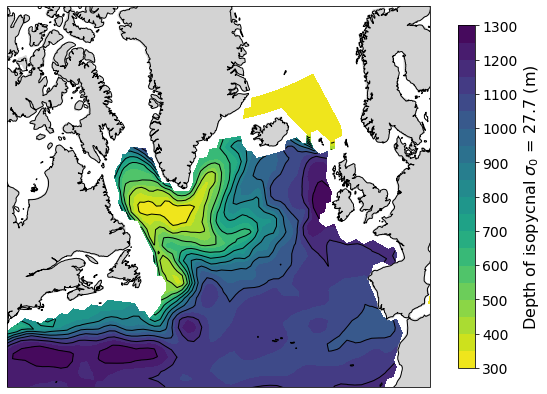

In [77]:
fig = plt.figure(figsize=(10,7))

ax = plt.axes(projection=cartopy.crs.LambertConformal(central_longitude=-45.0,central_latitude=50.0))
ax.set_extent([-72, -5, 30, 78], cartopy.crs.Geodetic())
ax.add_feature(cartopy.feature.LAND,color='lightgrey',zorder=1)
ax.coastlines(resolution='50m',linewidth=1.0,zorder=2)

#p = ax.pcolormesh(pden.lon-0.5, pden.lat-0.5, np.ma.masked_invalid(pden.sel(pres=300).mean('time')),
#                  cmap='nipy_spectral', vmin=26.4, vmax=28.00, transform=cartopy.crs.PlateCarree(),zorder=0)
p = ax.contourf(ipd.lon, ipd.lat,np.ma.masked_invalid(np.clip(ipd.mean('time'),300,1300)),
                cmap='viridis_r',vmin=300,vmax=1300,
                levels=np.arange(300,1350,50),transform=cartopy.crs.PlateCarree(),zorder=0)
ax.contour(ipd.lon, ipd.lat, np.ma.masked_invalid(ipd.mean('time')),
           levels=np.arange(350,1350,100), colors='k', linewidths=1, transform=cartopy.crs.PlateCarree(),zorder=0)

cb = fig.colorbar(p, ticks=np.arange(300,1400,100), orientation='vertical', shrink=0.9)
cb.set_label(r'Depth of isopycnal $\sigma_0$ = 27.7 (m)',fontsize=16)
cb.ax.tick_params(labelsize=14)

plt.savefig('/mnt/efs/figure.png')
plt.show()

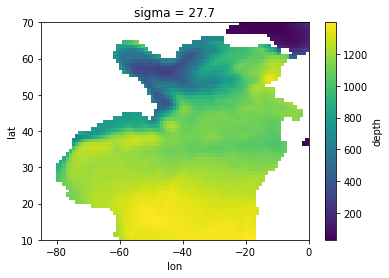

In [72]:
ipd.mean('time').plot()

In [81]:
psal = xr.open_dataset('/mnt/efs/data/RG_ArgoClim_ipd_north_atlantic.nc').psal.sel(sigma=27.70,
                                                                                   time=slice('2004-01-01',
                                                                                              '2018-12-31'))

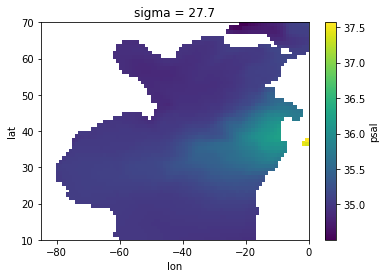

In [86]:
psal.mean('time').plot()